In [1]:
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter
from bs4 import BeautifulSoup
import requests
import random
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import jieba


In [70]:
import requests.packages.urllib3
requests.packages.urllib3.disable_warnings()
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}

from threading import Thread
def user_keyword(key,page):
    href_list = []
    key = key.replace(' ','+')
    web_page = (int(page)-1)//10
    page = int(page) - (web_page*10)

    for i in range(0,web_page+1):
        web_page_url = 'https://www.google.com/search?q='+key+'&start='+str(i*10)
        res = requests.get(web_page_url)
        res.encoding = res.apparent_encoding
        soup = BeautifulSoup(res.text,"lxml")
        href = soup.find_all('div',class_='ZINbbc xpd O9g5cc uUPGi')

        for a in href:
            j = a.find('a')
            url = j.get('href')
            if "url?q=http" in  url and "https://www.youtube.com/" not in url:
                try : 
                    url = url.split('&')[0][7:]
                    url = url.replace("25",'')
                    href_list.append(url)
                except:
                    print('error !!!')

    final_href_list = href_list[:web_page*10+page]
#     start_get_html(final_href_list)
    return final_href_list
#     print('here final list')
#     print(final_href_list)
    
    
def start_get_html(final_href_list):

    for article in range(len(final_href_list)) :
        thread = Thread(target= get_web_html, args=[article,final_href_list[article]])
        thread.start()
        thread.join()
        print(f'\r解析網站 ✅',article+1,':',final_href_list[article],end='\n', flush=True)


def get_web_html(article,url):
    all_sen_list = []
    all_title_list = []

    res = requests.get(url,verify=False,headers=headers)
    res.encoding = res.apparent_encoding
    soup = BeautifulSoup(res.text,"html5lib")

    for p in soup.find_all('p'):
        all_sen = p.get_text()   
                
        if len(all_sen) > 2:        
            try:
                h3 = p.find_previous(re.compile('h[1-4]')).get_text().replace('\r\n','').replace('\n','')              
                if h3 in all_title_list:  
                    try:
                        for i in range(len(all_title_list)):
                            if h3 == all_title_list[i]:
                                all_sen_list[i] = all_sen_list[i]+all_sen
                    except:
                        all_sen_list.append(all_sen)
                else :
                    if h3 != '':
                        all_title_list.append(h3)
                        all_sen_list.append(all_sen)   
                    else :
                        all_sen_list.append(all_sen)
                        all_title_list.append('Somthing worng : perhaps the title is image')
                    

            except Exception as e:
                print(f'\r解析網站 😕',article+1,':',"Something wrong. Perhaps this <p></p> no title.",e,end='\n', flush=True)

In [71]:
key = '益生菌'
page = 10
user_keyword(key,page)

['http://blog.vitabox.com.tw/2018/12/why-should-we-be-supplied-in-probiotics/',
 'https://www.dietician.com.tw/qna_info/0/1/1090',
 'https://takecareof.com.tw/supplement/probiotics-recommend/',
 'https://zh.wikipedia.org/zh-tw/%E7%9B%8A%E7%94%9F%E8%8F%8C',
 'https://udn.com/news/story/7266/4953332',
 'https://www.kskhealth.com/pages/2020-probiotics-recommend',
 'https://heho.com.tw/archives/92371',
 'https://www.dayhealth.com.tw/blog/probiotics-recommend-brand']

In [94]:
from bs4 import BeautifulSoup
import requests
import random
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import jieba


d = {'doc': [],'ptext':[],'url_num':[],'group':[]}
df = pd.DataFrame(data=d)
key = ' "seo公司" '
page = 10
url = user_keyword(key,page)
# url = ['https://www.da-vinci.com.tw/tw/blog/seo-cost',
# 'https://www.corners.com.tw/',
# 'https://inboundmarketing.com.tw/seo/seo%E5%85%AC%E5%8F%B8%E6%8E%A8%E8%96%A6.html',
# 'https://www.yesharris.com/before-seo-agency/',
# 'https://growthmarketing.tw/seo%E5%84%AA%E5%8C%96%E5%85%AC%E5%8F%B8/',
# 'https://ranking.works/SEO%E6%95%99%E5%AD%B8/SEO%E5%85%AC%E5%8F%B8',
# 'https://seookay.com/',
# 'https://seo.whoops.com.tw/',
# 'https://www.nss.com.tw/2020%E5%B9%B47%E6%9C%88%E6%9C%80%E6%96%B0%E5%8F%B0%E7%81%A3%E5%90%84%E5%AE%B6seo%E5%85%AC%E5%8F%B8%E6%8E%92%E5%90%8D%E5%84%AA%E5%8C%96%E8%B2%BB%E7%94%A8%E6%94%B6%E8%B2%BB%E4%B8%80%E8%A6%BD%E8%A1%A8/',
# 'https://seo.tenten.co/']

# url = [ 'http://blog.vitabox.com.tw/2018/12/why-should-we-be-supplied-in-probiotics/',
#  'https://takecareof.com.tw/supplement/probiotics-recommend/',
#  'https://www.dietician.com.tw/qna_info/0/1/1090',
#  'https://zh.wikipedia.org/zh-tw/%E7%9B%8A%E7%94%9F%E8%8F%8C',
#  'https://heho.com.tw/archives/92371',
#  'https://www.kskhealth.com/pages/2020-probiotics-recommend',
#  'https://www.kskhealth.com/pages/probiotics',
#  'https://www.dayhealth.com.tw/blog/probiotics-recommend-brand']
       
# crawler the ptext
doc_word = ''
now = 0
for num_url,x in enumerate(url):
    resp = requests.get(x)
    resp.encoding = resp.apparent_encoding
    soup = BeautifulSoup(resp.text, 'html.parser')
    for num,p in enumerate(soup.find_all('p')):
        
        doc_word = (p.get_text().replace(" ", "").replace("\xa0", "").replace('\r\n',"").replace('\n',"").replace('\t',""))
        if not doc_word or len(doc_word)==0:
            continue
        else:
            df['ptext'][now] = doc_word
            df['url_num'][now] = num_url

        now += 1

# use jibea to cut word
for x in range(len(df['ptext'])-1):
        df['doc'][x]  = ' '.join(jieba.cut(df['ptext'][x], cut_all=False, HMM=True))
            
# make word vector 
vectorizer = TfidfVectorizer(sublinear_tf=False, stop_words=None, token_pattern="(?u)\\b\\w+\\b", smooth_idf=True)  
X = vectorizer.fit_transform(df['doc'])
r = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names(), index=df['doc'])

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000, min_df=0.0001)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['doc'])
print(tfidf_matrix.shape)

# use kmeans
km = KMeans(n_clusters=5)
label = km.fit(tfidf_matrix)
clusters = km.labels_.tolist()
print(Counter(clusters))



(203, 1747)
Counter({3: 70, 0: 60, 2: 56, 4: 9, 1: 8})


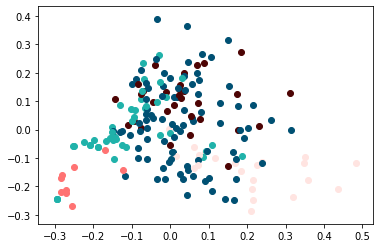

In [95]:
num_clusters = 5
num_seeds = 10
max_iterations = 300
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404',
    5: '#ccc0ba', 6: '#4700f9', 7: '#f6f900', 8: '#00f91d', 9: '#da8c49'
}
pca_num_components = 2
tsne_num_components = 2

# texts_list = some array of strings for which TF-IDF is being computed

# calculate tf-idf of texts
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000, min_df=0.0001)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['doc'])

# create k-means model with custom config
clustering_model = KMeans(
    n_clusters=num_clusters,
    max_iter=max_iterations,
    precompute_distances="auto",
    n_jobs=-1
)

labels = clustering_model.fit_predict(tfidf_matrix)
# print labels

X = tfidf_matrix.todense()

# ----------------------------------------------------------------------------------------------------------------------

reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
# print reduced_data

fig, ax = plt.subplots()
for index, instance in enumerate(reduced_data):
    # print instance, index, labels[index]
    pca_comp_1, pca_comp_2 = reduced_data[index]
    color = labels_color_map[labels[index]]
    ax.scatter(pca_comp_1, pca_comp_2, c=color)
plt.show()

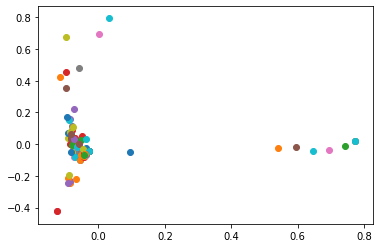

In [73]:
# plot in 2D, tf-idf scores for a dataset of texts.
#  run the tf-idf score data
X = tfidf_matrix.todense()
from sklearn.decomposition import PCA

pca_num_components = 2
reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
# print reduced_data

fig, ax = plt.subplots()
for index, instance in enumerate(reduced_data):
    # print instance, index, labels[index]
    pca_comp_1, pca_comp_2 = reduced_data[index]
#     color = labels_color_map[labels[index]]
    ax.scatter(pca_comp_1, pca_comp_2)
plt.show()

In [74]:
import numpy as np
indices = np.argsort(vectorizer.idf_)[::-1]
features = vectorizer.get_feature_names()
top_n = 20


top_features = [features[i] for i in indices[:top_n]]
print(top_features)


['點的', '左右手', '廁所時', '度', '幾乎', '平均', '幫助', '帶出', '帶', '已久', '已', '左邊', '左右', '慣養', '工具', '居家', '屁股', '屁屁', '尺寸', '尷尬']


In [75]:
km2 = KMeans(n_clusters=5)
label = km2.fit(tfidf_matrix)
km2.inertia_

# Sum of squared distances of samples to their closest cluster center.

# 498.3595710273938益生菌

# 191.6642219135894 seo公司

86.52662614896525

In [51]:
X = vectorizer.fit_transform(df['doc'])

In [76]:
d = pd.DataFrame(X.todense()).groupby(clusters).mean()

for i,r in d.iterrows():
#     print('\nCluster {}'.format(i))
    print(','.join([vectorizer.get_feature_names()[t] for t in np.argsort(r)[-5:]]))

AttributeError: 'matrix' object has no attribute 'todense'

In [61]:
import numpy as np
indices = np.argsort(vectorizer.idf_)[::-1]
features = vectorizer.get_feature_names()
top_n = 20


top_features = [features[i] for i in indices[:top_n]]
print(top_features)


5     \
1        1        4        1        2        4        2        2        1        4        4        2        4        4        2        4        2        4        4        1        1        4        1        1        4        1        2        4        4        4        1        4        1        1        1        4        4        4        4        4        4        4        4        2        2        2        2        2        2        2        2        2        2        2        3        2        4        2        2        4        2        2        1        1        1        2        4        4        4        1        1        1        1        2        1        4        4        1        2        1        1        4        3        1        1        3        3        2        3        3        1        1        3        1        4        1        1        3        1        4        1        2        1        1        1        4        1        4        1        1        1        1        4        4        1        1        1        1        2        4        1        1        2        4        4        4        4        4        4        4        4        2        2        3        1        4        1        1        1        1        1        1        4        1        1        1        4        1        1        4        4        2        4        1        4        4        1        4        1        4        1        4        4        1        1        1        1        4        1        4        4        1        4        4        1        4        0        0        0        0        0        0        0        0        0        1        1        4        4        4        1        4        4        4        4        1        4        1        1        4        4        1        4        1        4        1        4        4        4                    
0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000  0.001396   
                                                                                                                                                                                                            

In [60]:
if(df['group'] == '1'):



top_features = [features[i] for i in indices[:top_n]]
print(top_features)

In [92]:
df['group']

Series([], Name: group, dtype: float64)

In [91]:
len(df[df['group'] == 0 ]['doc'])

0

In [86]:
new_doc = df[df['group'] == '1']['doc']
responses = vectorizer.fit_transform(new_doc)

def get_top_tf_idf_words(response, top_n=2):
    sorted_nzs = np.argsort(response.data)[:-(top_n+1):-1]
    return feature_names[response.indices[sorted_nzs]]

print([get_top_tf_idf_words(response,2) for response in responses])



ValueError: empty vocabulary; perhaps the documents only contain stop words

In [54]:
if(df['group'] == '1'):
    indices = np.argsort(vectorizer.idf_)[::-1]
    features = vectorizer.get_feature_names()
    top_n = 2


    top_features = [features[i] for i in indices[:top_n]]
    print(top_features)

/Users/ginger/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [61]:
for col in X.nonzero()[1]:
    print(X[col], ' - ', X[0, col])
    print(X)

IndexError: row index (876) out of range

In [54]:
import numpy  as np
feature_array = np.array(vectorizer.get_feature_names())
tfidf_sorting = np.argsort(X).flatten()[::-1]

n = 3
top_n = feature_array[tfidf_sorting][:n]

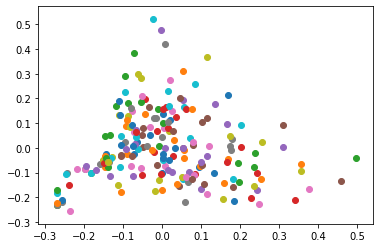

AttributeError: 'list' object has no attribute 'mean'

In [28]:
# save to excel
# import xlwt
# workbook = xlwt.Workbook()
# sheet = workbook.add_sheet('test')
# num = 0

for x in range(len(clusters)-1):
#         sheet.write(num,1,str(df['ptext'][x]))
#         sheet.write(num,2,str(clusters[x]))
        df['group[]'][x] = int(clusters[x])
        num += 1
    
# workbook.save('output.xls')

In [50]:
df['doc']

Series([], Name: doc, dtype: float64)

In [48]:
print(df.sort_values(by=['group']))

IndexError: indices are out-of-bounds

In [136]:
clusters = {}

n = 0
for item in km.labels_:
    if item in clusters:
        clusters[item].append([df['ptext'][n]])
        clusters['num'].append([df['url_num'][n]])
    else:
        clusters[item] = [df['ptext'][n]]
        clusters['num'] = [df['url_num'][n]]
    n +=1


[[0.         0.         0.         ... 0.         0.         0.00411426]
 [0.         0.         0.         ... 0.00534803 0.         0.        ]
 [0.00710809 0.         0.00628366 ... 0.         0.00177396 0.        ]
 [0.         0.02124177 0.01931328 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


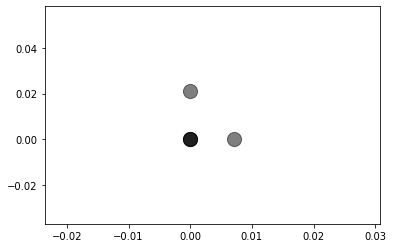

In [29]:

# # use kmeans
# km = KMeans(n_clusters=5)
# km.fit(tfidf_matrix)
# clusters = km.labels_.tolist()
# print(Counter(clusters))


centers = km.cluster_centers_
print(centers)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [33]:
tfidf_matrix.get_feature_names()

AttributeError: get_feature_names not found

In [6]:
clusters

[2,
 4,
 4,
 4,
 2,
 4,
 4,
 2,
 2,
 2,
 4,
 3,
 2,
 3,
 3,
 4,
 2,
 4,
 4,
 1,
 2,
 2,
 4,
 2,
 4,
 2,
 4,
 3,
 2,
 2,
 2,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 4,
 4,
 4,
 3,
 2,
 2,
 4,
 4,
 4,
 1,
 4,
 4,
 4,
 4,
 2,
 4,
 4,
 4,
 4,
 2,
 4,
 2,
 4,
 2,
 4,
 2,
 4,
 2,
 4,
 2,
 4,
 4,
 2,
 4,
 2,
 4,
 4,
 2,
 4,
 4,
 4,
 2,
 4,
 4,
 4,
 4,
 4,
 2,
 4,
 2,
 4,
 3,
 4,
 2,
 4,
 2,
 4,
 4,
 2,
 4,
 2,
 4,
 2,
 4,
 2,
 4,
 4,
 4,
 3,
 2,
 2,
 2,
 2,
 2,
 4,
 3,
 4,
 3,
 2,
 3,
 2,
 4,
 3,
 3,
 1,
 2,
 2,
 2,
 4,
 2,
 3,
 3,
 4,
 3,
 3,
 2,
 4,
 4,
 1,
 4,
 4,
 4,
 4,
 2,
 2,
 2,
 2,
 4,
 3,
 4,
 2,
 2,
 3,
 4,
 4,
 4,
 2,
 3,
 2,
 3,
 2,
 4,
 3,
 3,
 3,
 4,
 4,
 2,
 4,
 4,
 4,
 4,
 3,
 4,
 2,
 4,
 2,
 4,
 4,
 2,
 4,
 4,
 2,
 3,
 4,
 2,
 3,
 4,
 4,
 4,
 3,
 3,
 4,
 3,
 3,
 3,
 2,
 4,
 2,
 4,
 3,
 4,
 3,
 4,
 2,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 3,
 4,
 4,
 4,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 4,
 4,
 1,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 4,
 3,
 1,
 3,
 3,


In [7]:
for item in clusters:
    print ("Cluster ", item)
    for i in clusters[item]:
        print(i)

Cluster  2


TypeError: 'int' object is not iterable

In [9]:
clusters[0]

2

In [7]:
end_word = []
for x in range(len(all_doc)-1):
           end_word  = '  '.join(jieba.cut(all_doc[x], cut_all=False, HMM=True))
           df['doc'][x] = end_word

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/ds/z21pqrss7g998lr1bnr1tfcc0000gn/T/jieba.cache
Loading model cost 0.649 seconds.
Prefix dict has been built succesfully.


In [10]:

stopwords = {}.fromkeys([ line.rstrip() for line in open('停用詞-繁體中文.txt', encoding='utf8') ])
myHash = {};
for word in all_doc:
    if word not in stopwords:
        if word in myHash:
            myHash[word] += 1
        else:
            myHash[word] = 1

In [27]:
end_word = []
for x in range(len(all_doc)-1):
           end_word  = '  '.join(jieba.cut(all_doc[x], cut_all=False, HMM=True))
           df['doc'][x] = end_word

In [32]:
df['doc']

0      大家  都  在  討論  SEO  關鍵  字  排名  市場  報價  非常  紊亂  ...
1      大家  都  在  討論  SEO  關鍵  字  排名  市場  報價  非常  紊亂  ...
2      大家  都  在  討論  SEO  關鍵  字  排名  市場  報價  非常  紊亂  ...
3      大家  都  在  討論  SEO  關鍵  字  排名  市場  報價  非常  紊亂  ...
4      大家  都  在  討論  SEO  關鍵  字  排名  市場  報價  非常  紊亂  ...
                             ...                        
142    大家  都  在  討論  SEO  關鍵  字  排名  市場  報價  非常  紊亂  ...
143    大家  都  在  討論  SEO  關鍵  字  排名  市場  報價  非常  紊亂  ...
144    大家  都  在  討論  SEO  關鍵  字  排名  市場  報價  非常  紊亂  ...
145    大家  都  在  討論  SEO  關鍵  字  排名  市場  報價  非常  紊亂  ...
146    大家  都  在  討論  SEO  關鍵  字  排名  市場  報價  非常  紊亂  ...
Name: doc, Length: 147, dtype: object

In [33]:
def do_jibea(to_cut):
    end_word = []
    for x in range(len(to_cut)-1):
               end_word  = '  '.join(jieba.cut(to_cut[x], cut_all=False, HMM=True))
               df['doc'][x] = end_word
#     for x in range(len(to_cut)-1):
#                vectorizer = CountVectorizer(stop_words=None, token_pattern="(?u)\\b\\w+\\b")  
#                X = vectorizer.fit_transform([df['doc'][x]])
#                df['doc'][x] = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
#                print(X)
#                print(r)
#                vectorizer = TfidfVectorizer(sublinear_tf=False, stop_words=None, token_pattern="(?u)\\b\\w+\\b", smooth_idf=True)  
#                X = vectorizer.fit_transform([df['doc'][x]])
#                r = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names(), index=[df['doc'][x]])
#                print("TFIDF")
#                print(r)

    # Instantiate TfidfVectorizer object with stopwords and tokenizer
    # parameters for efficient processing of text
    vectorizer = TfidfVectorizer(sublinear_tf=False, stop_words=None, token_pattern="(?u)\\b\\w+\\b", smooth_idf=True)  
    X = vectorizer.fit_transform(df['doc'])
    r = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names(), index=df['doc'])
    
    tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000, min_df=0.0001)
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['doc'])
    print(tfidf_matrix.shape)
    
    km = KMeans(n_clusters=3)
    km.fit(tfidf_matrix)
    clusters = km.labels_.tolist()
    # Create a column cluster to denote the generated cluster for each movie
    r = clusters
    # Display number of films per cluster (clusters from 0 to 4)
#     print(km.labels_)
    print(Counter(clusters))
do_jibea(all_doc)

(147, 706)
Counter({1: 54, 0: 51, 2: 42})


In [31]:
print(df['doc'][0])

   seo  一樣  不  人  依據  像是  免費  公司  到  加上  ...  討論  設計  該  說  辦  辨識  都  關鍵  非常  \
0    5   1  1  1   1   1   1   1  1   1  ...   1   1  1  1  1   1  3   1   1   

   飛車  
0   1  

[1 rows x 49 columns]


In [ ]:
from bs4 import BeautifulSoup
import requests
import random
import re
resp = requests.get('https://www.da-vinci.com.tw/tw/blog/seo-cost')
soup = BeautifulSoup(resp.text, 'html.parser')
all_doc = []
doc_word = ''
for p in soup.find_all('p'):
     doc_word = doc_word + (p.get_text().replace("\xa0", "").replace('\r\n',"").replace('\n',"").replace('\t',""))
     doc_word = re.sub(r'[^\w\s]','',doc_word)
     all_doc.append(doc_word)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import jieba
d = {'doc': []}
df = pd.DataFrame(data=d)
def do_jibea(to_cut):
     end_word = []
     for x in range(len(to_cut)-1):
               end_word  = '  '.join(jieba.cut(to_cut[x], cut_all=False, HMM=True))
               df['doc'][x] = end_word
     for x in range(len(to_cut)-1):
               vectorizer = CountVectorizer(stop_words=None, token_pattern="(?u)\\b\\w+\\b")  
               X = vectorizer.fit_transform([df['doc'][x]])
               r = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
               # print("CountVector")
               # print(r)
               vectorizer = TfidfVectorizer(sublinear_tf=False, stop_words=None, token_pattern="(?u)\\b\\w+\\b", smooth_idf=True)  
               X = vectorizer.fit_transform([df['doc'][x]])
               r = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names(), index=[df['doc'][x]])
               print("TFIDF")
               print(r)
do_jibea(all_doc)